# Transient gradient artifact filtering in the Fourier domain on 2D time-resolved spectroscopy map

# Licence
MIT license

# Credit
M. Vega, J-F. Bryche, P.L. Karsenti, P. Gogol, G. Beaudin, M. Canva, P.G. Charette

- Laboratoire Nanotechnologies et Nanosystèmes (LN2)

- Laboratoire Charles Fabry (LCF)

- Institut Interdisciplinaire d'Innovation Technologique (3iT) 

- Centre de Nanosciences et de Nanotechnologies (C2N)

- Centre National de la Recherce Scientifique (CNRS)

- Université de Sherbrooke (UdS)

- Université Paris-Saclay 

# Package requirements and information
See the `README.md` and `requirements.txt` files in the project root directory

In [82]:
import matplotlib.pyplot as plt
from transient_grating_artifact_filter import transient_grating_artifact_filter

# Matplotlib initializations

In [83]:
plt.rcParams.update(
    {
        "figure.dpi": 200,
        "figure.figsize": [10, 5],
        "font.size": 6,
        "lines.linewidth": 0.5,
        "axes.linewidth": 0.5,
        "image.cmap": "coolwarm",
    },
)

# Load experimental data
Example data files in ".mat" (Matlab) and ".xlsx" (Excel) file formats are available in the *data* sub-directory

In [84]:
# Choice of sample to simulate: "gold_film", "croix", "nano_pillars", or "rhodamine"
substrate_type: str = "croix"

# Define simulation parameters for the selected sample
if substrate_type == "gold_film":
    # Unstructured (smooth) gold film
    fname: str = "Figure_article_Parallel.mat"
    lambda0_pump: float = 600.0
    artifact_extent_λ: float = 26
    artifact_extent_t: float = 0.35

elif substrate_type == "croix":
    # Structured gold film (nano-crosses)
    fname: str = "Croix.mat"
    lambda0_pump: float = 670.0
    artifact_extent_λ: float = 26
    artifact_extent_t: float = 0.35

elif substrate_type == "nano_pillars":
    # Structured gold film (nano-pillars)
    fname = "Data_ROD_600_long.mat"
    lambda0_pump = 600.0
    artifact_extent_λ = 25
    artifact_extent_t = 0.47

elif substrate_type == "rhodamine":
    # Rhodamine solution atop unstructured gold film
    fname = "Data_Rhodamine_570_2.mat"
    lambda0_pump = 570.0
    artifact_extent_λ = 22
    artifact_extent_t = 0.55
    lambda_time_profile: float = 566.74

else:
    raise ValueError("Unknown substrate type!")


# Parameters

In [85]:
# Thresholds for filter construction
threshold_ellipse: float = 0.1
threshold_cutout: float = 0.5

# Optional parameters
lambda_time_profile: float = 0
cross_pass_band_width: int = 0
pass_upper_left_lower_right_quadrants: bool = True

transient_grating_artifact_filter.py v3.01 (running Python 3.11.4)


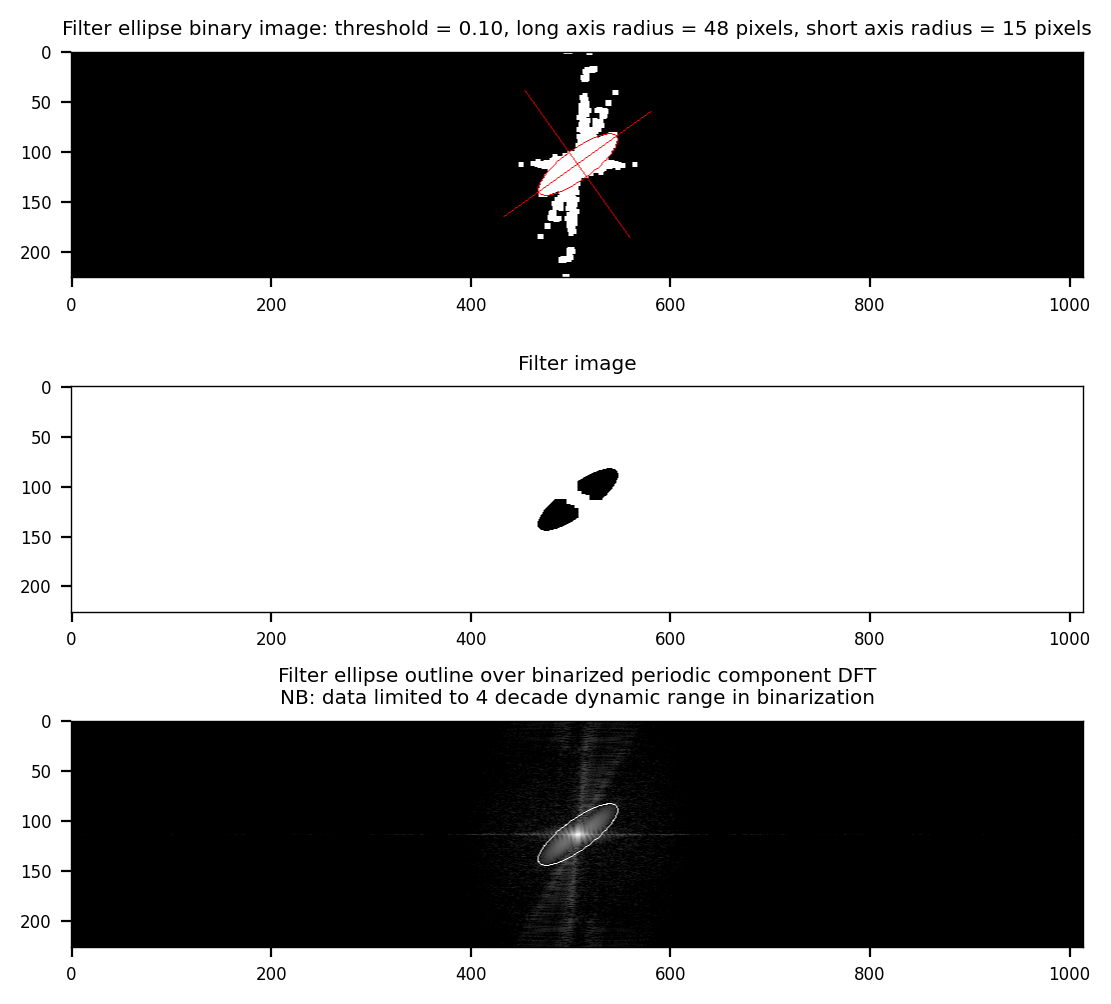

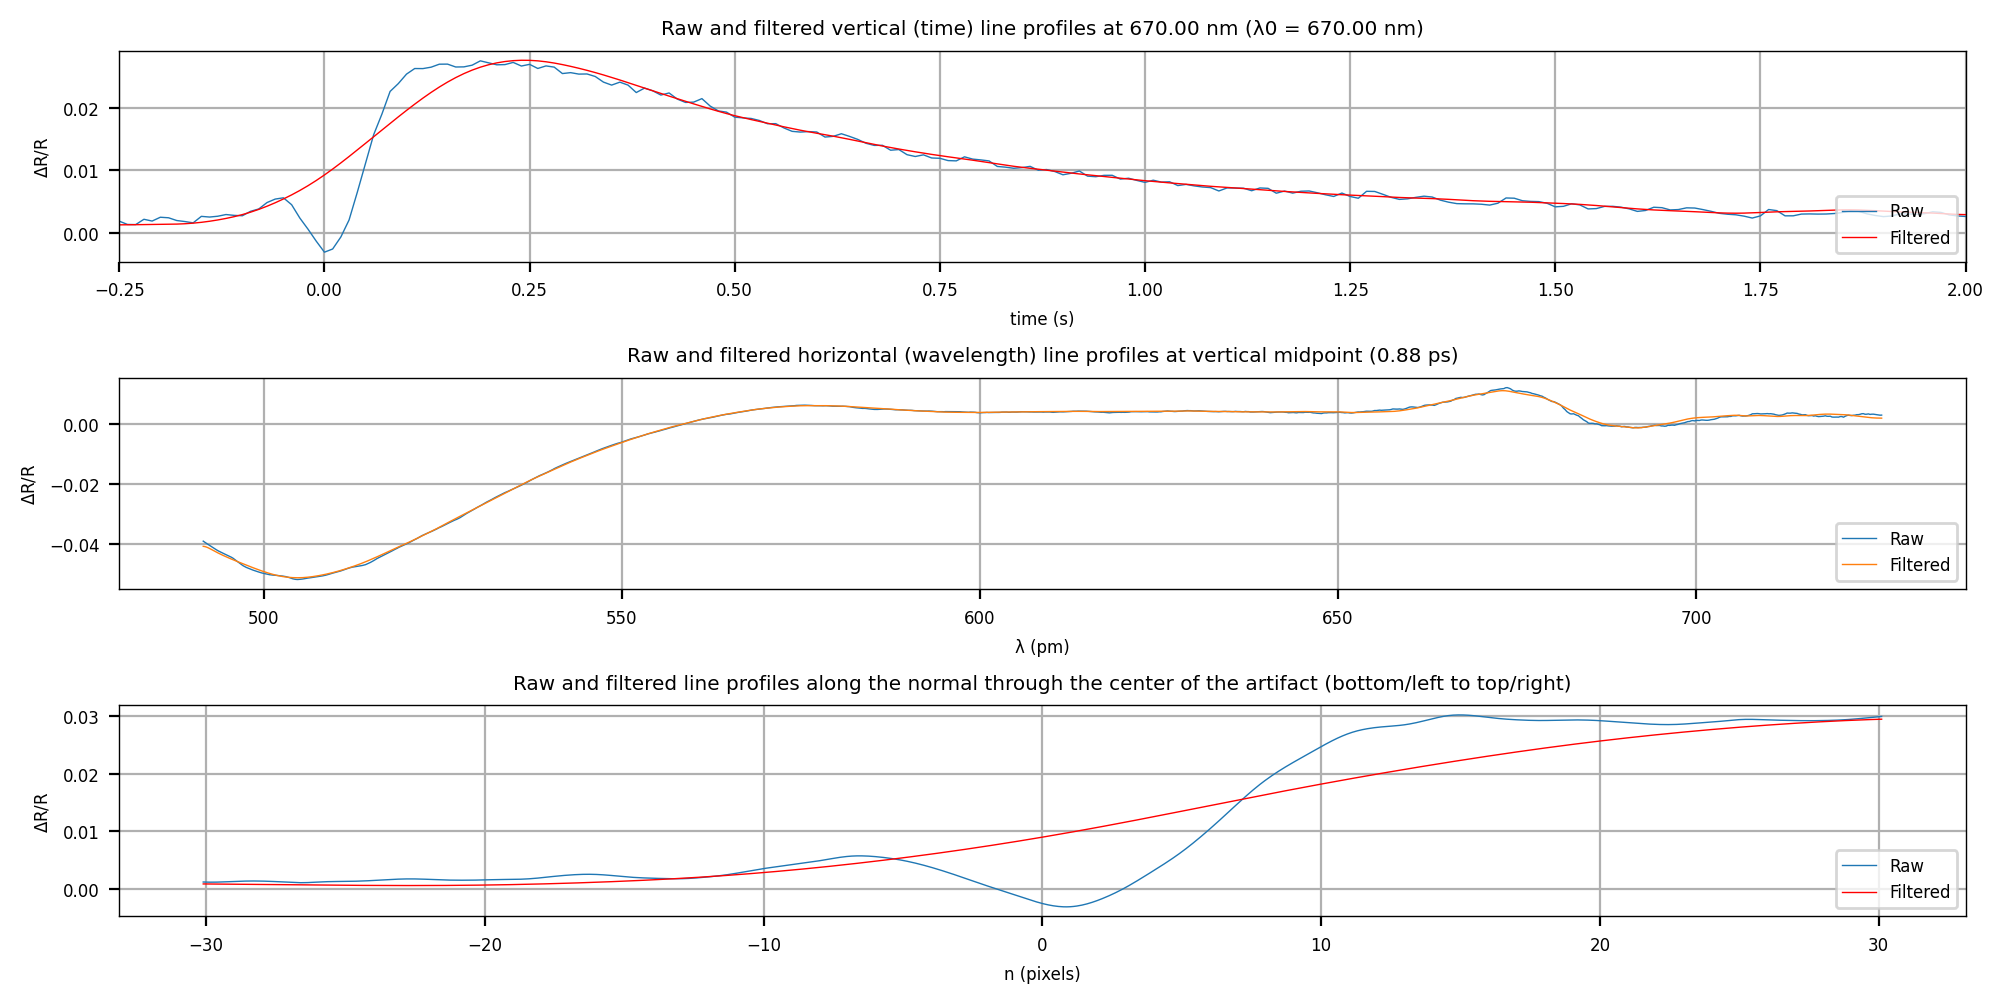

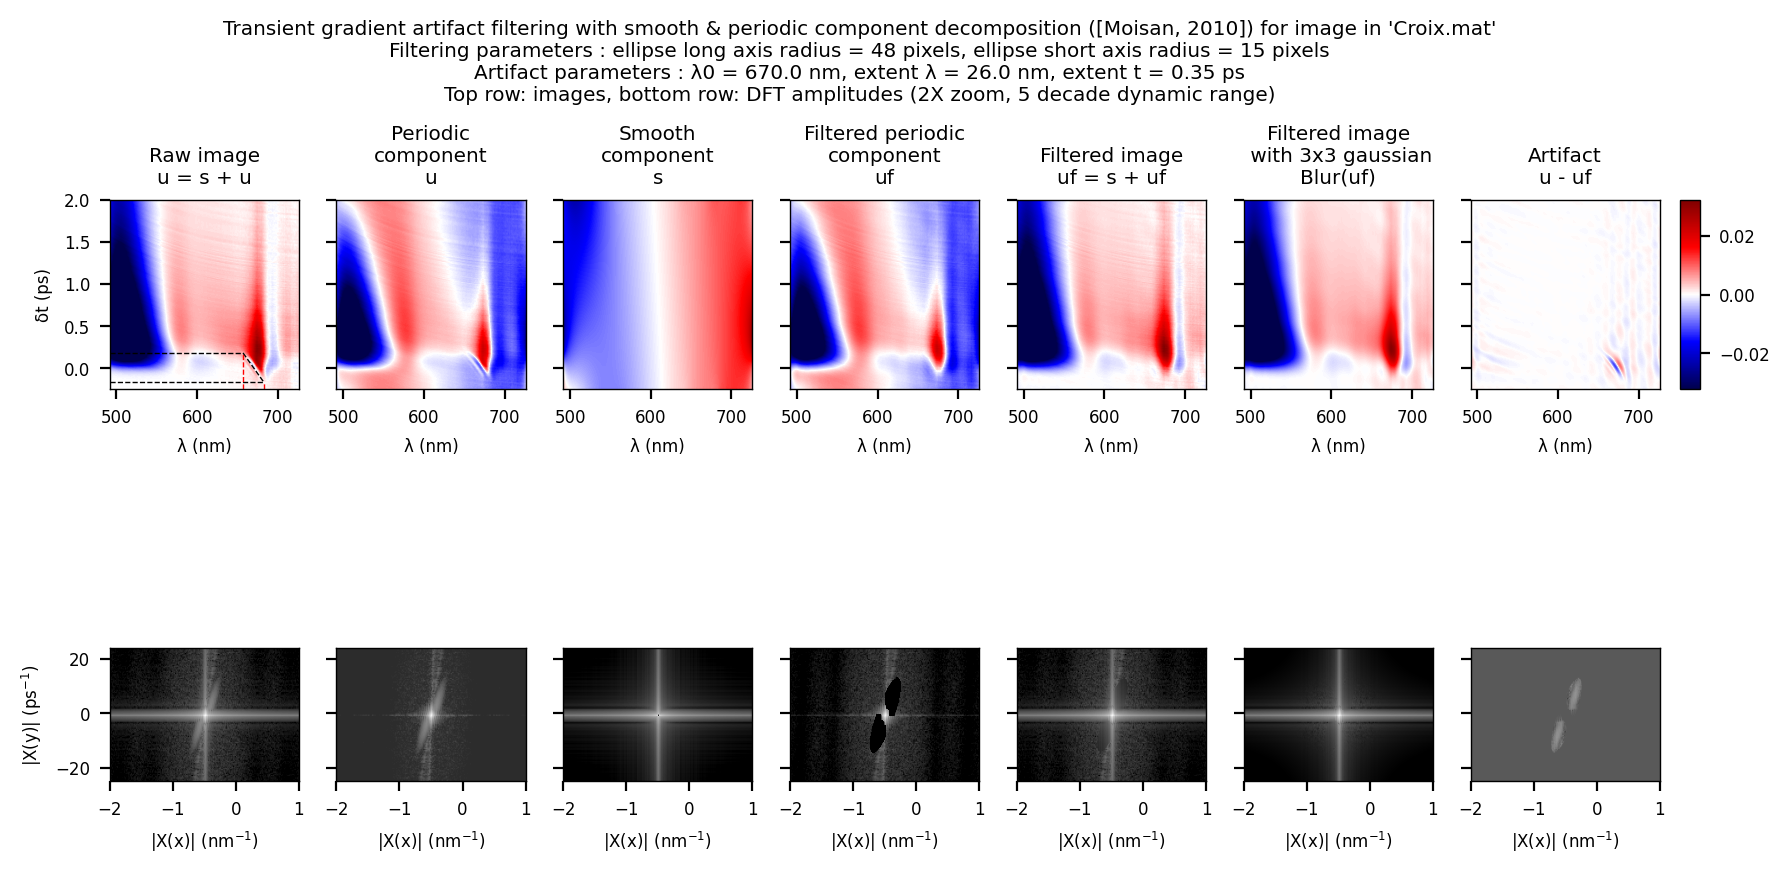

In [87]:
# Run the simulation
result = transient_grating_artifact_filter(
    fname=fname,
    lambda0_pump=lambda0_pump,
    artifact_extent_lambda=artifact_extent_λ,
    artifact_extent_t=artifact_extent_t,
    threshold_ellipse=threshold_ellipse,
    threshold_cutout=threshold_cutout,
    lambda_time_profile=lambda_time_profile,
    cross_pass_band_width=cross_pass_band_width,
    pass_upper_left_lower_right_quadrants=pass_upper_left_lower_right_quadrants,
)